In [1]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

Shape: (540, 960, 3)


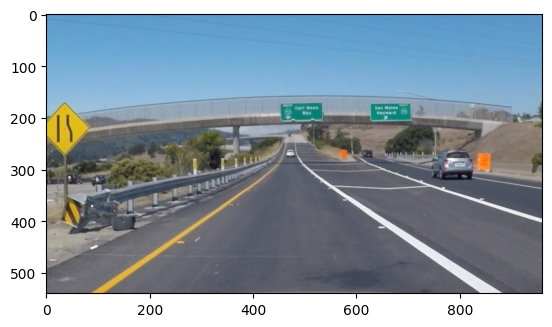

In [2]:
## reading an image
image = mpimg.imread("exit-ramp.jpg")
print(f"Shape: {image.shape}")
plt.imshow(image)

## Apply the Hough Transform

In [3]:
## convert the image into grayscale
gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

## smooth the image usin gaussian filter
kernel_size = 5
smooth_image = cv2.GaussianBlur(gray_scale, (kernel_size, kernel_size),0)

## detect the edges using canny edge dectector
low_threshold = 50
high_threshold = 150
edges_image = cv2.Canny(smooth_image,low_threshold, high_threshold)

## get the lines by applying hough transform in rho and theta form
rho = 1
theta = np.pi/180
threshold = 1
min_line_legth = 10
max_line_gap = 1
line_image = np.copy(image)*0         # creating blank images to draw lines on 

lines = cv2.HoughLinesP(edges_image, rho, theta, threshold, np.array([]), min_line_legth, max_line_gap)

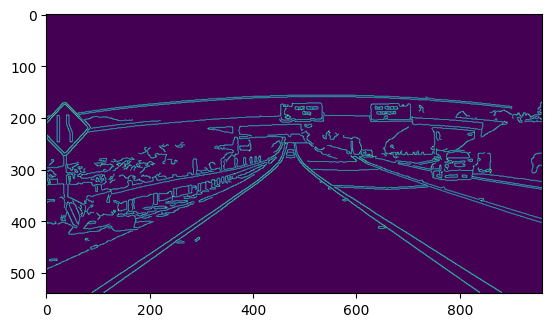

In [4]:
## show the detected edges image
plt.imshow(edges_image)

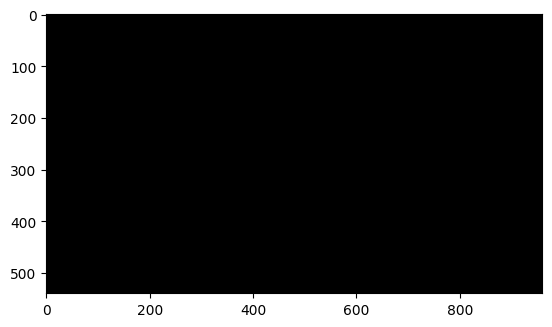

In [5]:
# print the blank line_image
plt.imshow(line_image)

In [6]:
## draw lines on the blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

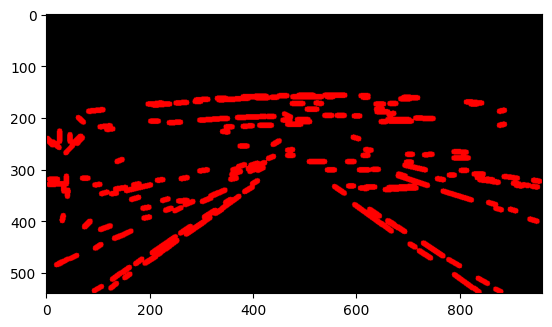

In [7]:
plt.imshow(line_image)

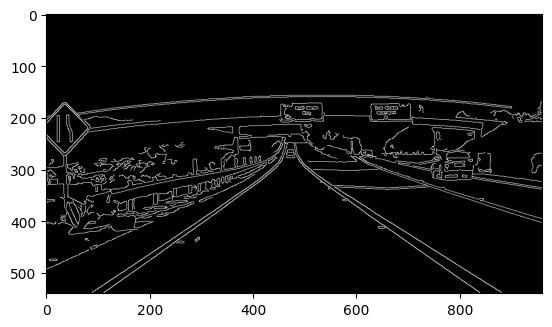

In [8]:
## blend the line_image and edges_image
"""
using cv2.addweighted() function for this 
generic syntax:
    output = cv2.addWeighted(source1, alpha, source2, beta, gamma[, dst[, dtype]])
    output is the image where we will multiply souce1 with the alpha value and the second source with 
    beta value. Gamma value is added to this value. 

###imp points###
source1 and source2 have same size and channels
"""
edges_image_colored_version = np.dstack((edges_image, edges_image, edges_image))

##blend the images
blend_image = cv2.addWeighted(edges_image_colored_version,0.8,line_image,1,0)

# show the edges colored version image
plt.imshow(edges_image_colored_version)

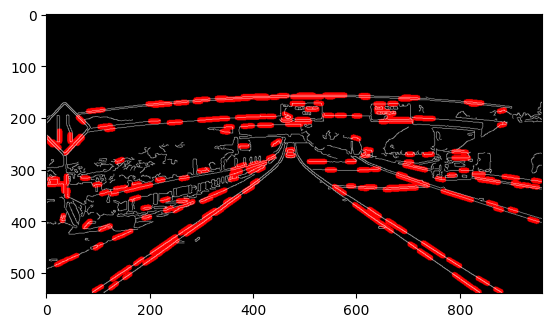

In [9]:
# show the blended version image
plt.imshow(blend_image)

## Improving the above detected Lines

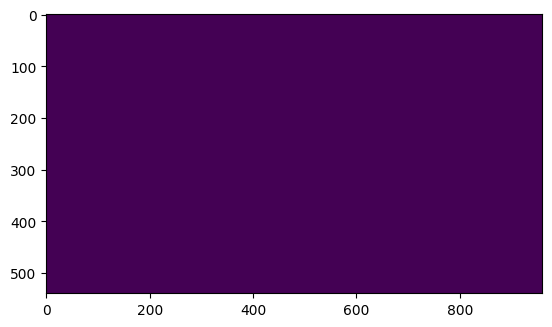

In [11]:
mask_image = np.zeros_like(edges_image)
plt.imshow(mask_image)

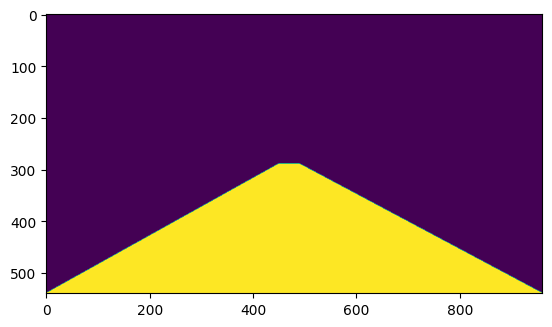

In [14]:
## draw a four sided ploygon on this image
## (x,y) form, (0,0) top left corner
y,x,_=image.shape
vertices = np.array([[(0,y),(450,290),(490,290),(x,y)]], dtype=np.int32)
cv2.fillPoly(mask_image, vertices, 255)
plt.imshow(mask_image)

In [ ]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
# vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
plt.imshow(mask)
# masked_edges = cv2.bitwise_and(edges, mask)

# # Define the Hough transform parameters
# # Make a blank the same size as our image to draw on
# rho = 1 # distance resolution in pixels of the Hough grid
# theta = np.pi/180 # angular resolution in radians of the Hough grid
# threshold = 1     # minimum number of votes (intersections in Hough grid cell)
# min_line_length = 5 #minimum number of pixels making up a line
# max_line_gap = 1    # maximum gap in pixels between connectable line segments
# line_image = np.copy(image)*0 # creating a blank to draw lines on

# # Run Hough on edge detected image
# # Output "lines" is an array containing endpoints of detected line segments
# lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
#                             min_line_length, max_line_gap)

# # Iterate over the output "lines" and draw lines on a blank image
# for line in lines:
#     for x1,y1,x2,y2 in line:
#         cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# # Create a "color" binary image to combine with line image
# color_edges = np.dstack((edges, edges, edges)) 

# # Draw the lines on the edge image
# lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
# plt.imshow(lines_edges)